In [257]:
import warnings
warnings.filterwarnings('ignore')

In [258]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [259]:
# visulaisation
from matplotlib.pyplot import xticks
get_ipython().run_line_magic('matplotlib', 'inline')

In [260]:
# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [261]:
data=pd.DataFrame(pd.read_csv('student-por.csv'))
data.head(5)

,id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,2,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,3,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,4,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,5,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [262]:
#checking duplicates
sum(data.duplicated(subset = 'id')) == 0


True

In [263]:
data.shape

(649, 34)

In [264]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          649 non-null    int64 
 1   school      649 non-null    object
 2   sex         649 non-null    object
 3   age         649 non-null    int64 
 4   address     649 non-null    object
 5   famsize     649 non-null    object
 6   Pstatus     649 non-null    object
 7   Medu        649 non-null    int64 
 8   Fedu        649 non-null    int64 
 9   Mjob        649 non-null    object
 10  Fjob        649 non-null    object
 11  reason      649 non-null    object
 12  guardian    649 non-null    object
 13  traveltime  649 non-null    int64 
 14  studytime   649 non-null    int64 
 15  failures    649 non-null    int64 
 16  schoolsup   649 non-null    object
 17  famsup      649 non-null    object
 18  paid        649 non-null    object
 19  activities  649 non-null    object
 20  nursery   

In [265]:
data.describe()

,id,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,325.000000,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,187.494444,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,1.000000,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,325.000000,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,487.000000,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,649.000000,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [266]:
data.isnull().sum()

id            0
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [267]:
varlist =  ['schoolsup', 'famsup','paid','activities','nursery','higher','internet','romantic']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
data[varlist] = data[varlist].apply(binary_map)


In [268]:
data.head(5)

,id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11,11
1,2,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11,11
2,3,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13,12
3,4,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14,14
4,5,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13,13


In [269]:
# #### For categorical variables with multiple levels, create dummy features (one-hot encoded)

# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(data[['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian']], drop_first=True)
dummy1.head(5)



,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0
3,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0
4,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0


In [270]:
dummy1.shape

(649, 18)

In [271]:
# Adding the results to the master dataframe
data = pd.concat([dummy1,data], axis=1)
data.head(5)

,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11,11
1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,2,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11,11
2,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,3,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13,12
3,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,4,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14,14
4,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,5,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13,13


In [272]:
data.shape

(649, 52)

In [273]:
data=data.drop(['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian'],axis=1)
data.head(5)

,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,id,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,18,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11,11
1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,2,17,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11,11
2,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,3,15,1,1,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13,12
3,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,4,15,4,2,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14,14
4,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,5,16,3,3,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13,13


In [274]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = data.drop(['G3','id'], axis=1)
y=data['G3']

In [275]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   school_MS          649 non-null    uint8
 1   sex_M              649 non-null    uint8
 2   address_U          649 non-null    uint8
 3   famsize_LE3        649 non-null    uint8
 4   Pstatus_T          649 non-null    uint8
 5   Mjob_health        649 non-null    uint8
 6   Mjob_other         649 non-null    uint8
 7   Mjob_services      649 non-null    uint8
 8   Mjob_teacher       649 non-null    uint8
 9   Fjob_health        649 non-null    uint8
 10  Fjob_other         649 non-null    uint8
 11  Fjob_services      649 non-null    uint8
 12  Fjob_teacher       649 non-null    uint8
 13  reason_home        649 non-null    uint8
 14  reason_other       649 non-null    uint8
 15  reason_reputation  649 non-null    uint8
 16  guardian_mother    649 non-null    uint8
 17  guardian_other  

In [276]:
y.head()

0    11
1    11
2    12
3    14
4    13
Name: G3, dtype: int64

In [277]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=100)



In [286]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [279]:
y_pred = regressor.predict(X_test)

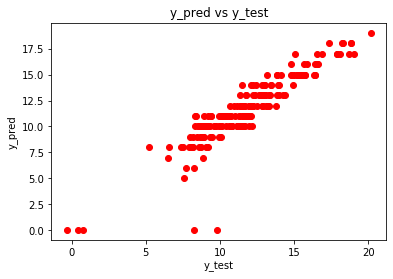

In [285]:
plt.scatter(y_pred, y_test, color = 'red')
plt.title('y_pred vs y_test')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [287]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8231382391944484